In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df1 = pd.read_csv('university_rank_2020.csv', index_col='University')
df2 = pd.read_csv('university_rank_other.csv', delim_whitespace=True)
df3 = pd.read_excel('university_rank_students.xlsx', index_col='University')
df3.to_csv('csvfile.csv', encoding='utf-8')

In [3]:
df = pd.concat([df1, df2, df3], axis=1)

In [4]:
print('Rows:', df.shape[0])
print('Columns:', df.shape[1])
print(df.head(10))

Rows: 1396
Columns: 13
                                              Country  Number_students  \
University of Oxford                   United Kingdom           20.664   
California Institute of Technology      United States            2.240   
University of Cambridge                United Kingdom           18.978   
Stanford University                     United States           16.135   
Massachusetts Institute of Technology   United States           11.247   
Princeton University                    United States            7.983   
Harvard University                      United States           20.823   
Yale University                         United States           12.402   
University of Chicago                   United States           13.833   
Imperial College London                United Kingdom           16.760   

                                       Numb_students_per_Staff  Score_Result  \
University of Oxford                                      11.2          95.4   
Ca

In [5]:
print(df.isnull().sum())

Country                       0
Number_students               0
Numb_students_per_Staff       0
Score_Result                  0
Rank                          0
Teaching                      0
Research                      0
Citations                     0
Industry_Income               0
International_Outlook        11
International_Students(%)    38
Percentage_Female(%)         36
Percentage_Male(%)           27
dtype: int64


In [6]:
df['International_Outlook'].fillna((df['Teaching'] < 20).map({True:'bad'}))
df['International_Outlook'].fillna((df['Teaching'] > 60).map({True:'excellent'}))
df['International_Outlook'].fillna(value = 'good', inplace = True)

In [7]:
for i in df.columns[df.isnull().any(axis=0)]: #Applying Only on variables with NaN values for faster performance
    df[i].fillna(df[i].mean(),inplace=True)

In [8]:
print(df['Country'].value_counts())

United States     172
Japan             110
United Kingdom    100
China              81
India              56
                 ... 
Jamaica             1
Kenya               1
Uganda              1
Costa Rica          1
Georgia             1
Name: Country, Length: 92, dtype: int64


In [9]:
print(df.loc[df['Country'] == 'Slovenia'])

                          Country  Number_students  Numb_students_per_Staff  \
University of Ljubljana  Slovenia           40.110                     14.7   
University of Maribor    Slovenia           12.124                     13.6   

                         Score_Result  Rank  Teaching  Research  Citations  \
University of Ljubljana          29.5   356      21.1      18.7       44.8   
University of Maribor            23.0   418      17.0      15.8       31.0   

                         Industry_Income International_Outlook  \
University of Ljubljana             39.7                  good   
University of Maribor               40.0                   bad   

                         International_Students(%)  Percentage_Female(%)  \
University of Ljubljana                        6.0                  60.0   
University of Maribor                          5.0                  55.0   

                         Percentage_Male(%)  
University of Ljubljana                40.0  
Univers

In [10]:
df['Staff_Skills'] = df.apply (lambda row: (row['Teaching'] + row['Research']) / 2, axis=1)
print(df.head(3))

                                           Country  Number_students  \
University of Oxford                United Kingdom           20.664   
California Institute of Technology   United States            2.240   
University of Cambridge             United Kingdom           18.978   

                                    Numb_students_per_Staff  Score_Result  \
University of Oxford                                   11.2          95.4   
California Institute of Technology                      6.4          94.5   
University of Cambridge                                10.9          94.4   

                                    Rank  Teaching  Research  Citations  \
University of Oxford                   1      90.5      99.6       98.4   
California Institute of Technology     2      92.1      97.2       97.9   
University of Cambridge                3      91.4      98.7       95.8   

                                    Industry_Income International_Outlook  \
University of Oxford        

In [11]:
df.drop('Staff_Skills', axis=1, inplace=True)

In [12]:
df.to_csv('university_rank.csv', sep=';', encoding='utf-8')

In [13]:
print(df.sort_values(by=['Rank'], ascending=False).index.values[:10])

['Tokyo Denki University' 'University of Caxias do Sul'
 'Bashkir State University'
 'Pontifical Catholic University of Minas Gerais' 'Cear� State University'
 'Chiba Institute of Technology'
 'Federal University of Mato Grosso do Sul' 'S�leyman Demirel University'
 'MIREA - Russian Technological University' 'Perm State University']


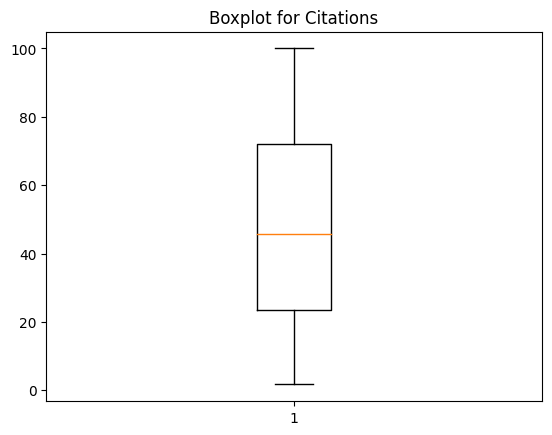

In [14]:
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot for Citations')
ax1.boxplot(df['Citations'])

plt.show()

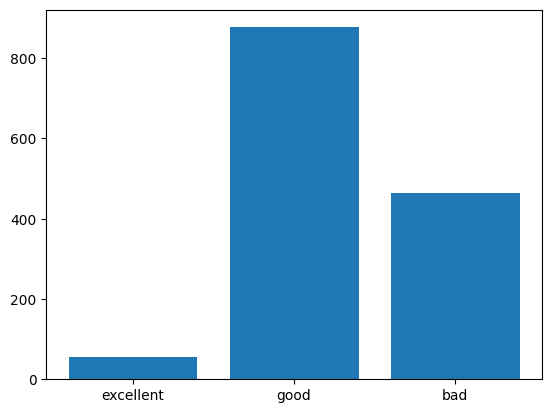

In [15]:
x = df['International_Outlook'].unique().tolist()
y = []
for i in x:
    y.append(df['International_Outlook'].value_counts()[i])
plt.bar(x, y)
plt.show()

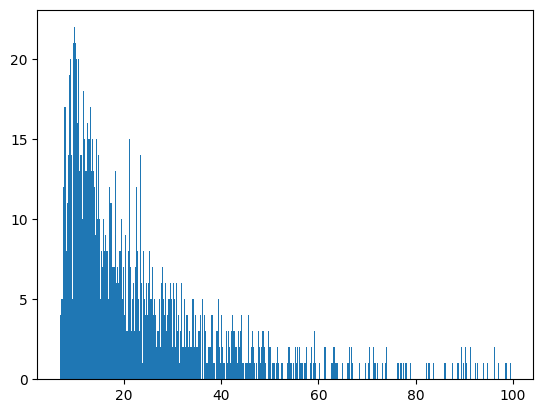

In [16]:
plt.hist(df['Research'], bins=len(df['Research'].unique().tolist()))
plt.show()

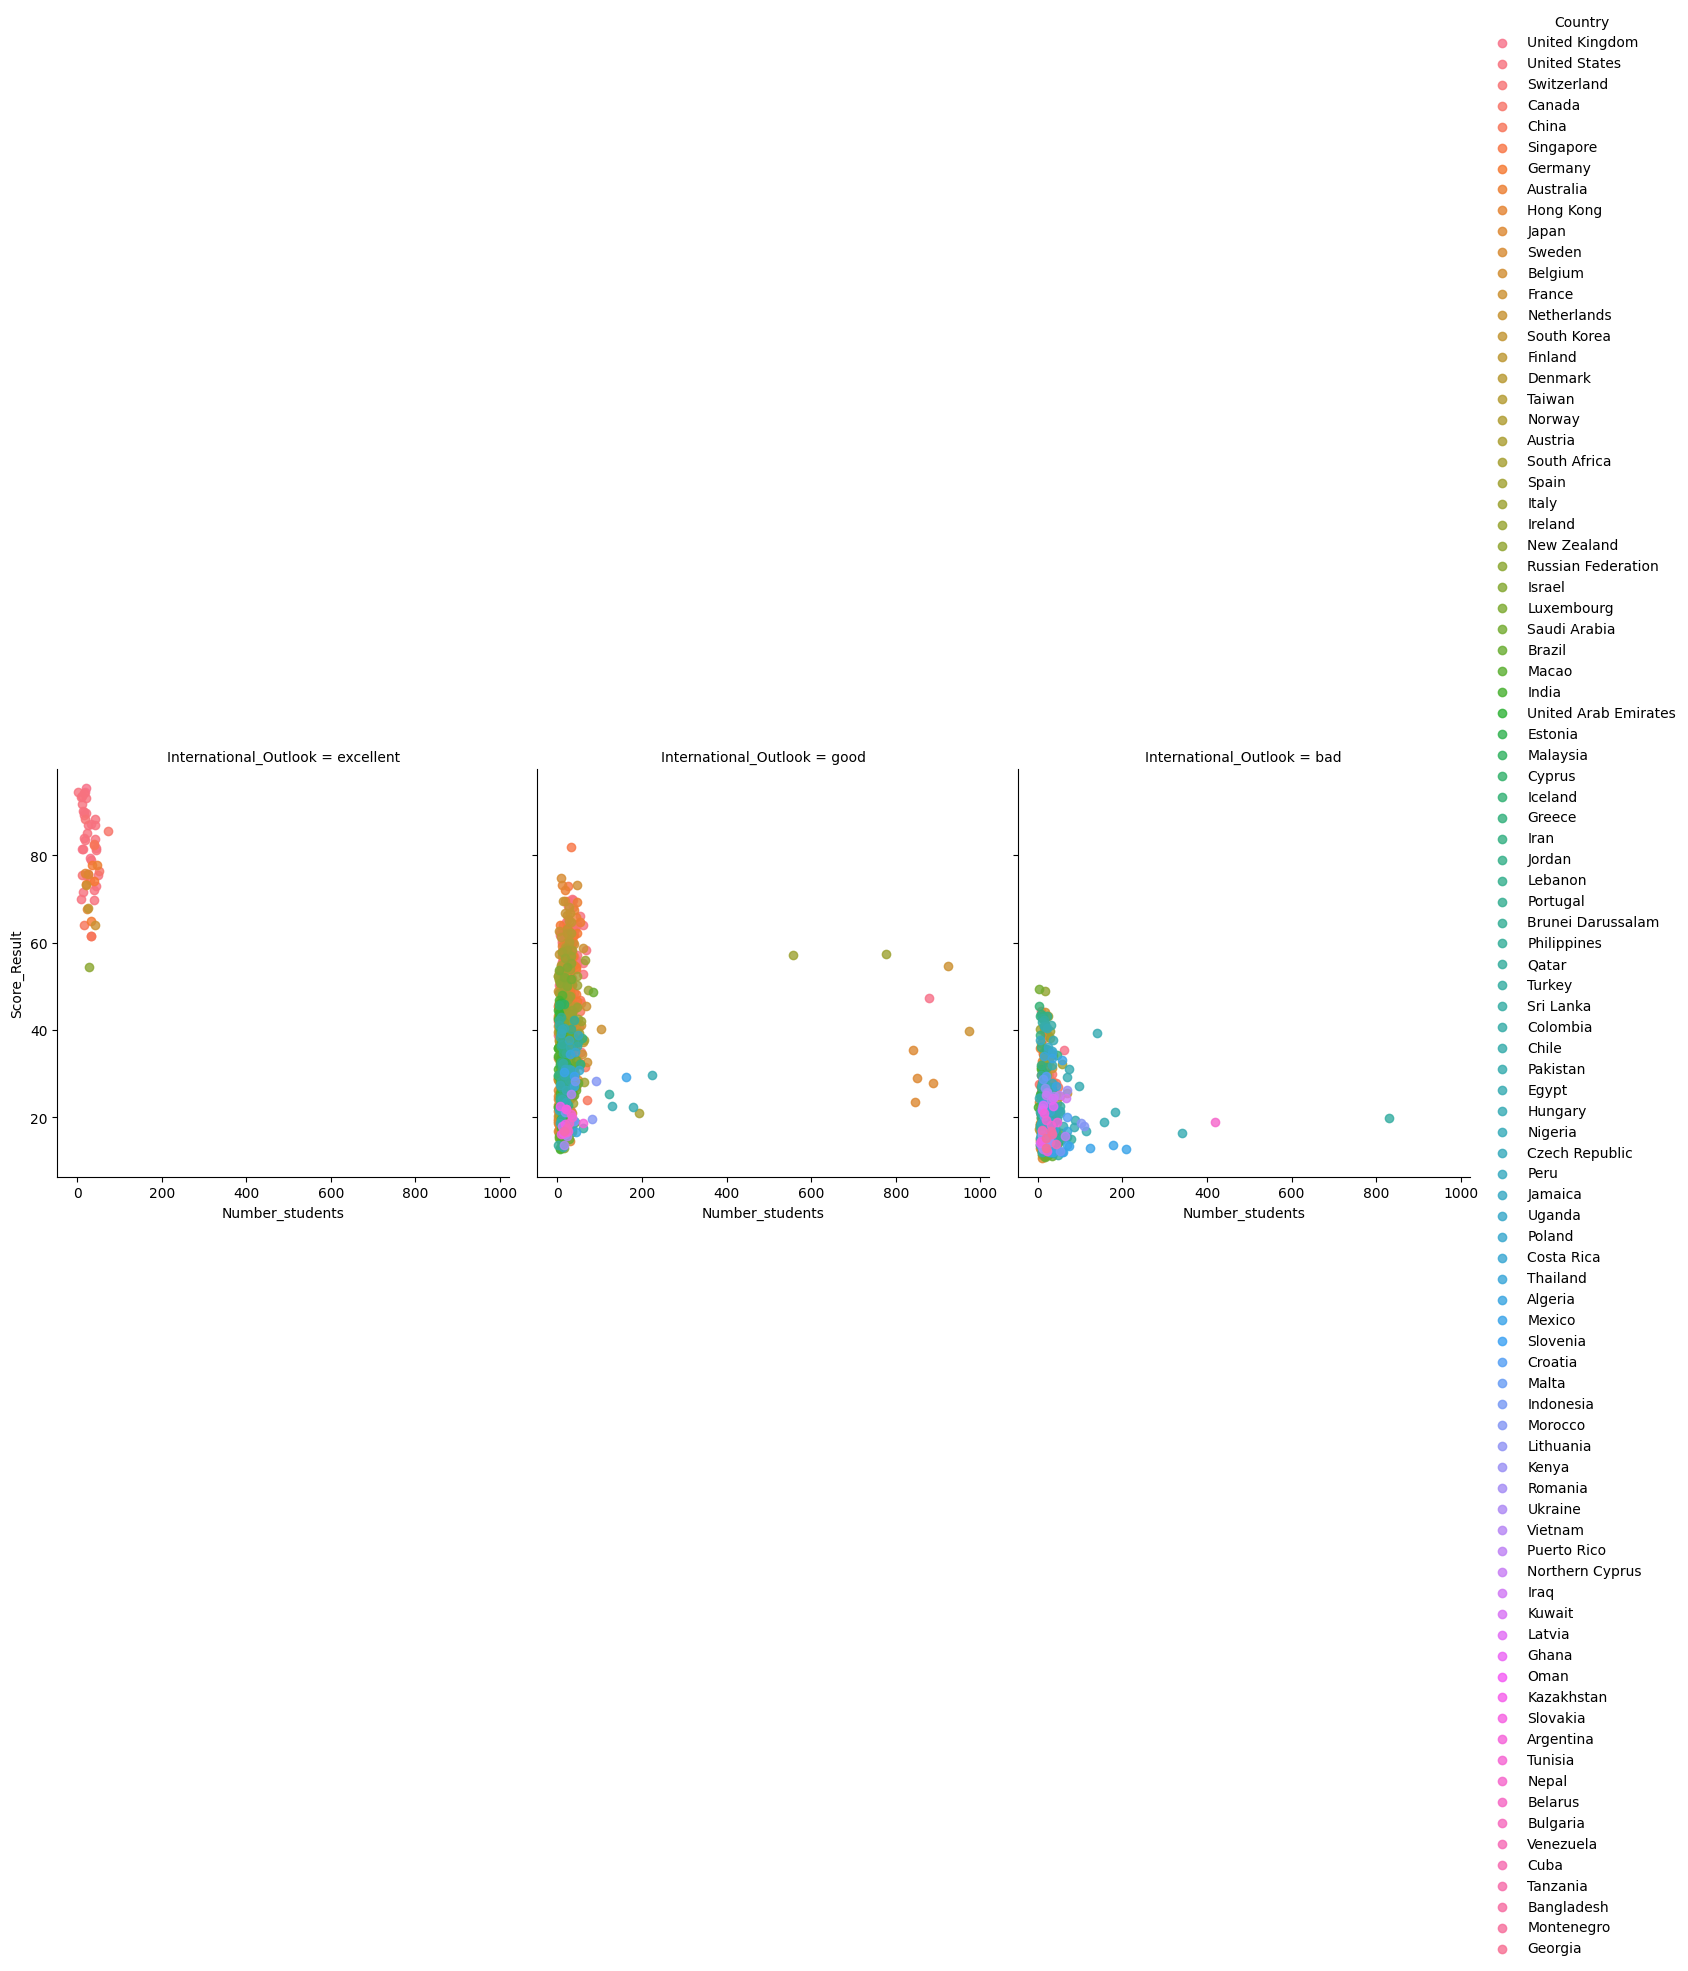

In [17]:
sns.lmplot(x='Number_students', y='Score_Result', data=df,fit_reg=False,hue='Country',col='International_Outlook')
plt.show()

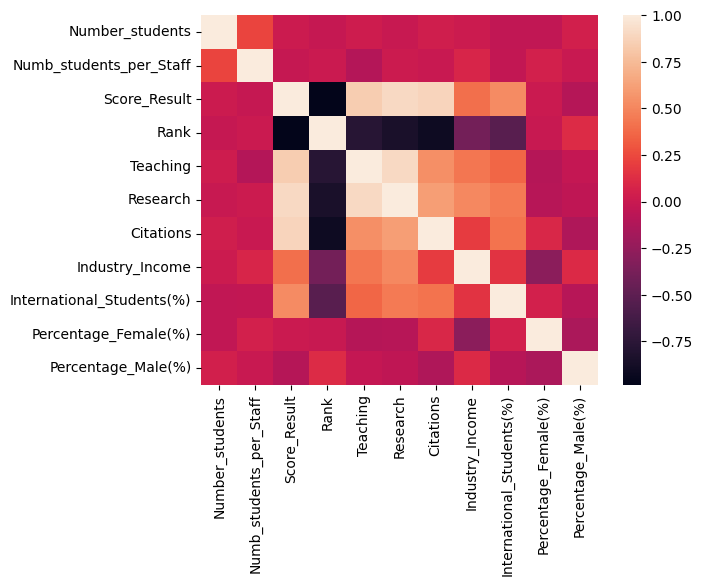

In [18]:
corr = df.corr()
sns.heatmap(corr)
plt.show()

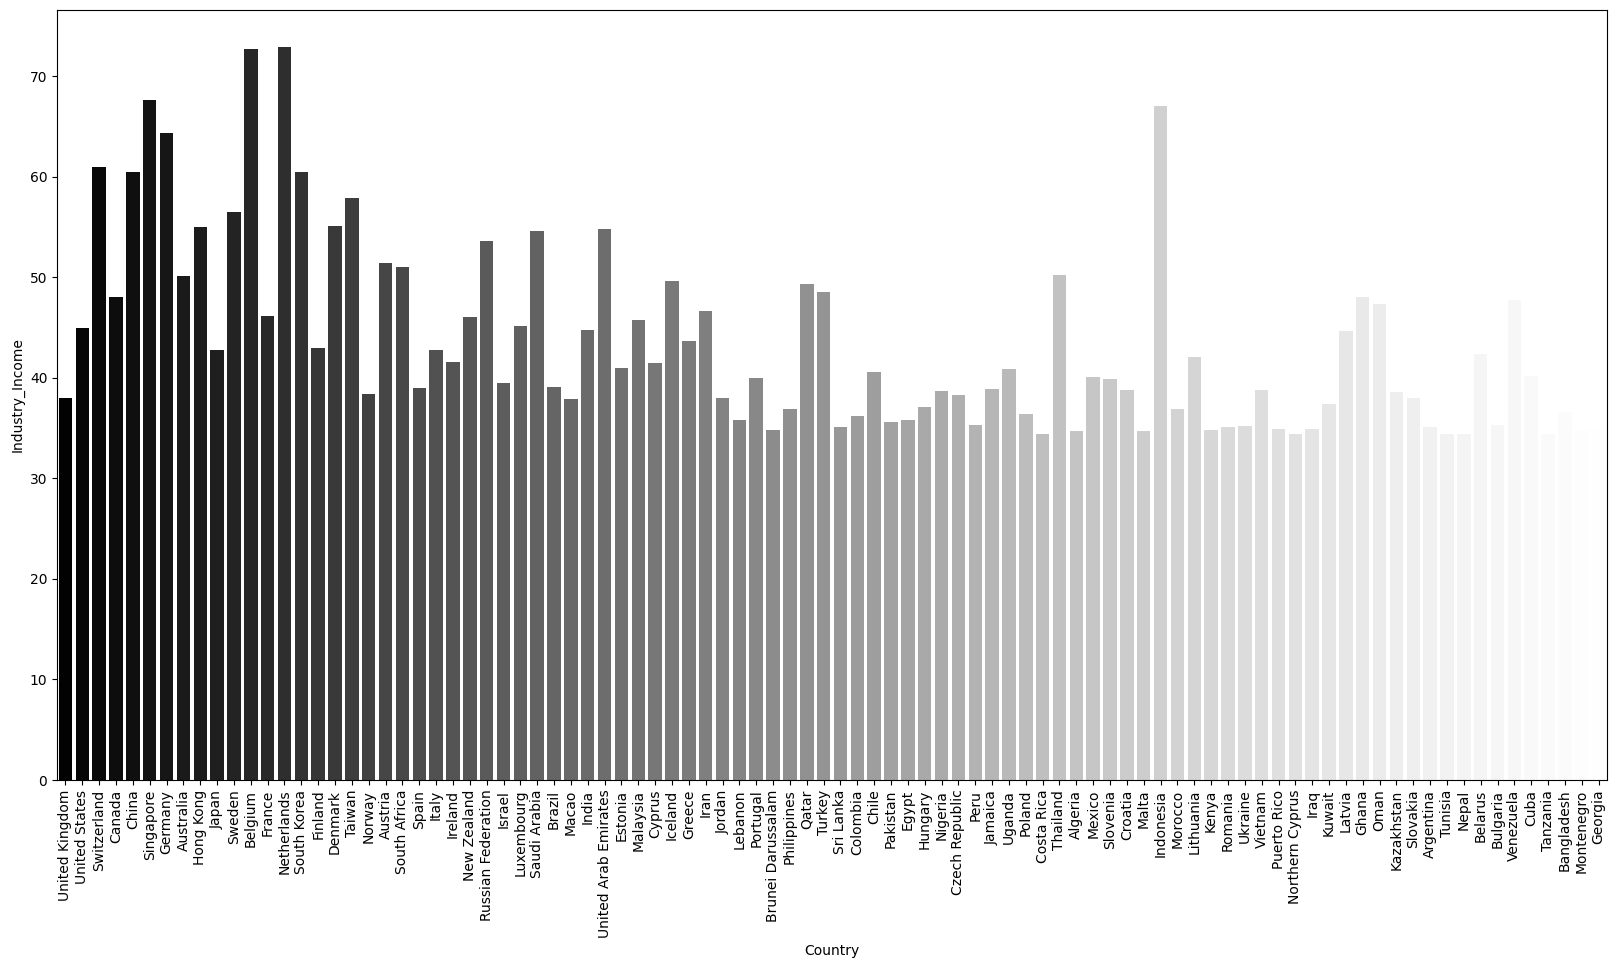

In [19]:
plt.figure(figsize=(20,10))
sns.barplot(y='Industry_Income', x='Country', data=df, estimator=np.mean, palette='Greys_r', errorbar=None)
plt.tick_params(axis='x', rotation=90)